# Classifying convertion rates for bank customers

This project is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. The goal is to compare the performance of classification algorithms (Logistic, naive bayes and KNN- k nearest neighbor) to predict or classify a customer as purchasing a personal loan or not.

The dataset for the project contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

The following is the outline of the project

1. Reading the dataset and exploring the data columns

2. Data labeling and formatting

4. Splitting labeling and scaling the data

5. Data modeling

6. Model assesment

### Reading and Exploring the dataset

In [1]:
# Importing importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
# Reading the dataset

data = pd.read_csv('original.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


The information about the data columns are as follows

ID - unique ID of the customer

Age - The age of the customer

Experience - work experience of the customer

Income - The income of the customer

Zip Code - The customer's zip code 

Family - The family size of the customer

CCAvg - The average credit card spending of the customer

Education - The educational level of the customer

Mortgage - Indicator of if the customer has or does not have a mortgage

Personal loan - Indicates whether a customer purchased the private loan during the last campaign

Security Account - Indicates if the customer has a security account with the bank

CD Account - Indicates if the customer has a CD account with the bank

Online - Indicates if the customer banks online

CreditCard - Indicates if the customer has a credit card account with the bank

In [3]:
# Checking the dataset for null values

data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The dataset has no nan values. Next the data columns' types will be investigated

In [4]:
# Checking the columns datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All of the data columns appear to have the proper data type. The target variable personal loan will be converted to categorical

In [5]:
data['Personal Loan'] = data['Personal Loan'].astype('category')

In [6]:
data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan         category
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

Next the data columns' distributions will be explored

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

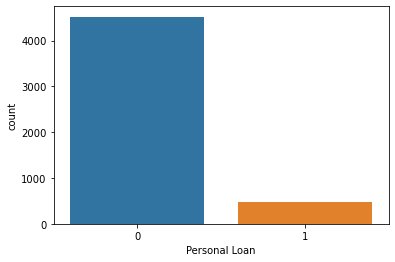

In [7]:
sns.countplot(x=data['Personal Loan'])

In [8]:
no_rows_0s = data[data['Personal Loan'] == 0].shape[0]
no_rows_1s = data[data['Personal Loan'] == 1].shape[0]
print('Ratio of non purchases to purchases:', str(int(no_rows_0s/no_rows_1s))+':'+'1')

Ratio of non purchases to purchases: 9:1


The majority class of the target variable clearly has a majority of the records in the dataset. Before training data models this has to be addressed by resampling to ensure that the bias in the classification model is reduced especially when the model will be used for making predictions with new data. 

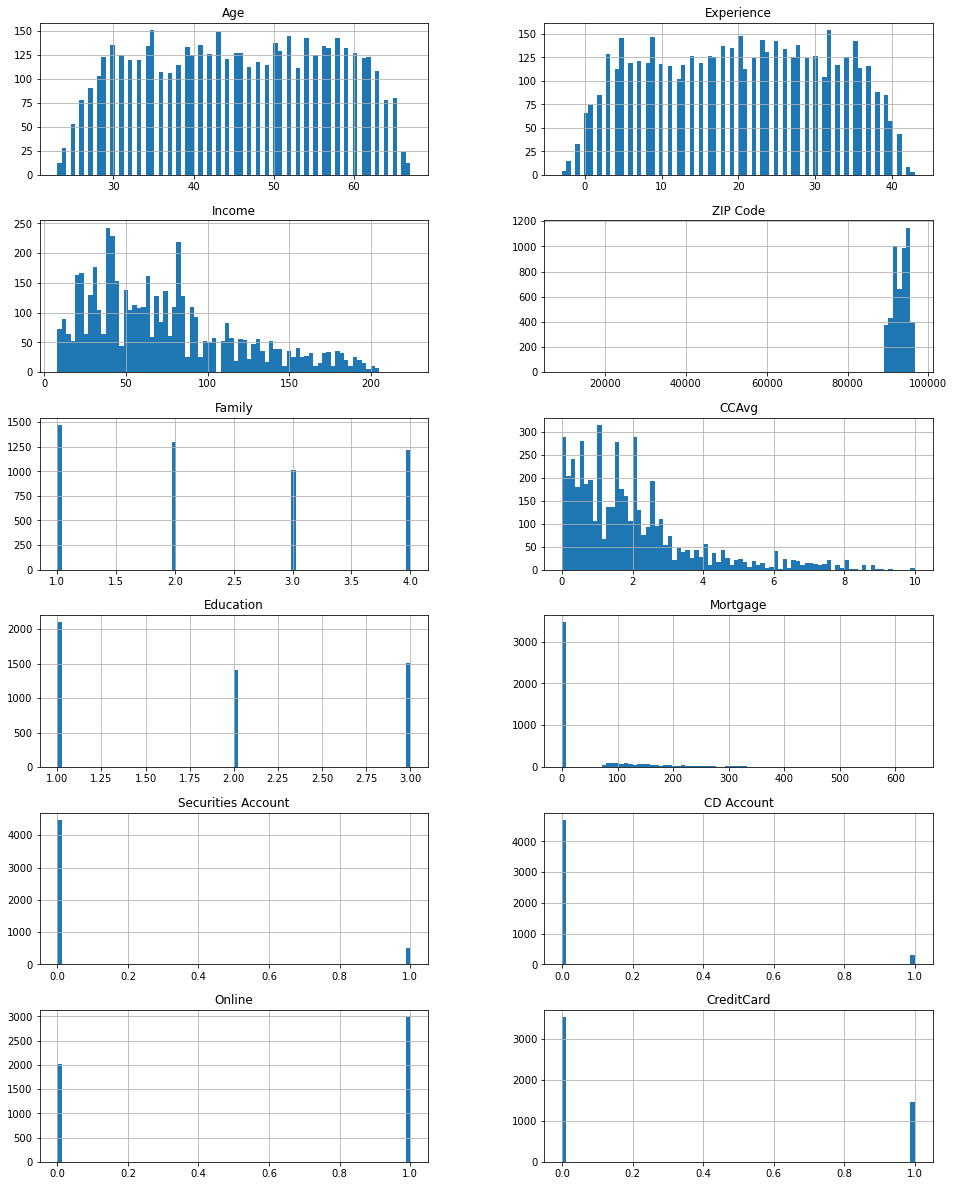

In [9]:
columns = data.columns[1:]
data[columns].hist(bins = 80, figsize=(16,50), layout=(14,2));

It is noteworthy that majority of the customers do not have financial instruments except a credit card account with the bank with the majority of them earning between 45 and 50K and spending on crdeit cards below 2K. They majority also are also of working age between 30 and 60 year with 30 to 35 years of work experience. The variables Family and Education datatypes will be changed to categorical variables by using dummy variables. 

Below a correlation plot will display the relationship between the variables.

In [10]:
corr = data.corr()

<AxesSubplot:>

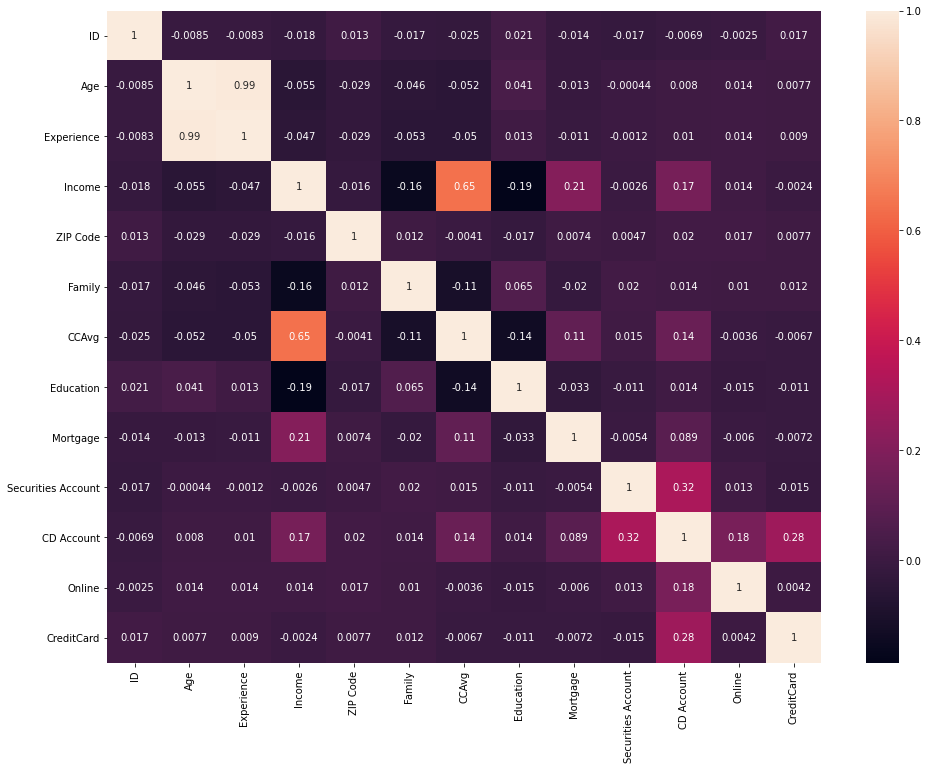

In [11]:
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True)

The variables do not show significant relationships with each other except for the inherent relationships between credit card spending and income which has a weak positve relationship and experience and age. The relationship between the important variables and how they relate to a customer purchasing a loan from the bank are as follows below  

In [12]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


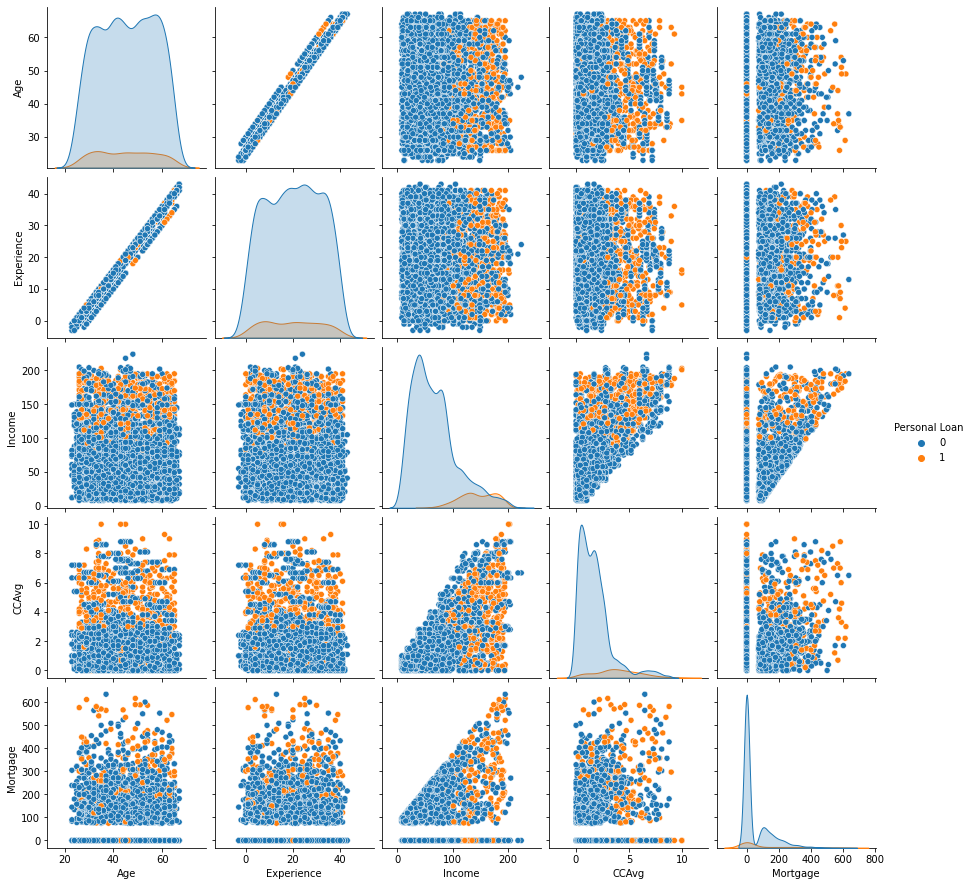

In [14]:
sns.pairplot(data, vars=cols, hue='Personal Loan')
plt.show()

From the above plot some observations can be made. For instance as incomes and the amount customers pays for a mortgage the more customers tend to have accepted the loan offered by the bank. The same trend happens with the age and experience of the customers especially if they are over 40 years old. For all ages of the customers they tend to have accepted the bank loan when they earned over 100K. 

The dataset will be labeled, formatted and scaled before fitting and comparing the performance of the classification model

### Data labeling splitting and scaling

To handle the different range of values and scales for the variables the data will be normalized by subtracting the mean of the columns distribution and dividing it by the standard deviation. Before that the data will be split into the training and testing datasets using train test split. 

The problem of balancing the dataset can be handled by oversampling the minority class or undersampling the majority class for the records. The SMOTE method (Synthetic Minority Over-sampling Technique) can be used as well it produces artificial data points for the minority class to match up the data in the majority class. This resampling technique should only be performed on the training data to avoid data leaks and to train the best possible model with the training data.

In [15]:
# Dropping the irrelevant columns

data.drop(axis=1, columns=['ID', 'ZIP Code'], inplace=True)

In [16]:
# Labeling the target and predictor variables

y = data['Personal Loan']
data.drop(axis=1, columns='Personal Loan', inplace=True)
X = data

In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

In [18]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [19]:
# Train test split

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
# Performing a SMOTE resampling to balance the training set

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [21]:
# Normalizing the dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler_fit = scaler.fit(x_train_smt)
x_train_trans = scaler_fit.transform(x_train_smt)
x_test_trans = scaler_fit.transform(x_test)

## Model building

Three classification models will be compared based on accurracy scores. The model that performs the best will be used as the classification algorithm to predict whether a customer purchased a loan during the bank's last advertising campaign.

In [23]:
knn_model = KNeighborsClassifier()
bayes_model = GaussianNB()
log_model = LogisticRegression()

In [24]:
knn_fit = knn_model.fit(x_train_trans, y_train_smt)
bayes_fit = bayes_model.fit(x_train_trans, y_train_smt)
log_fit = log_model.fit(x_train_trans, y_train_smt)

In [25]:
print('The accuracy score for the KNN:',round(knn_fit.score(x_train_trans, y_train_smt), 2))
print('The accuracy score for the Naive bayes:',round(bayes_fit.score(x_train_trans, y_train_smt), 2))
print('The accuracy score for the Logistic regression:',round(log_fit.score(x_train_trans, y_train_smt), 2))

The accuracy score for the KNN: 0.97
The accuracy score for the Naive bayes: 0.89
The accuracy score for the Logistic regression: 0.9


The best classification model of the three is the k-nearest neighbor classifier. A grid search for the parameters to use for the KNN model can help to improve the model before using it on the test data. 

In [26]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {
    'n_neighbors':[5, 6, 7, 8],    
    'weights':('uniform', 'distance'),
    'algorithm':('auto', 'ball_tree', 'kd_tree'),
    'leaf_size':[30, 35],
    'p':[1, 2],
    'metric':('minkowski', 'euclidean', 'manhattan')
}

In [34]:
gs = GridSearchCV(knn_model, parameters, cv=7, verbose=0)
gs.fit(x_train_trans, y_train_smt)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree'),
                         'leaf_size': [30, 35],
                         'metric': ('minkowski', 'euclidean', 'manhattan'),
                         'n_neighbors': [5, 6, 7, 8], 'p': [1, 2],
                         'weights': ('uniform', 'distance')})

The best estimators for the KNN classifier using a grid search is below. They will be used for building the model

In [41]:
gs.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [44]:
algorithm = 'auto'
leaf_size = 30
metric = 'minkowski'
n_neighbors = 6
p = 1
weights = 'distance'

KNN_model = KNeighborsClassifier(algorithm=algorithm, 
                                 leaf_size=leaf_size, 
                                 n_neighbors=n_neighbors, 
                                 p=p, 
                                 weights=weights)

In [49]:
KNN_fit = KNN_model.fit(x_train_trans, y_train_smt)

## Model evaluation

The model's performance will be evaluated based on the classification score, confusion matrix and the F1 score table. 

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
y_pred = KNN_model.predict(x_test_trans)
acc_score = accuracy_score(y_test, y_pred)

In [65]:
print('The accuraccy score for the KNN classifier:',str(round(acc_score,2))+'%')

The accuraccy score for the KNN classifier: 0.93%


<AxesSubplot:>

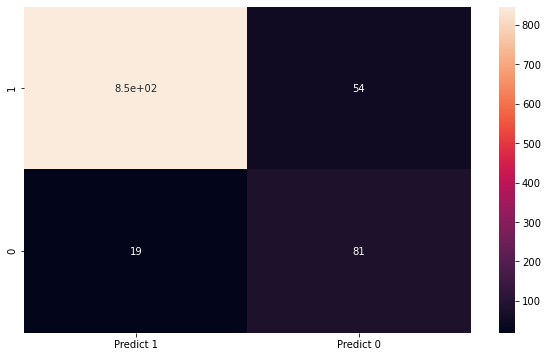

In [69]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], 
                         columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,6))
sns.heatmap(df_cm, annot=True)

In [70]:
print('Classification report')
print(classification_report(y_test, y_pred, labels=[1, 0]))

Classification report
              precision    recall  f1-score   support

           1       0.60      0.81      0.69       100
           0       0.98      0.94      0.96       900

    accuracy                           0.93      1000
   macro avg       0.79      0.88      0.82      1000
weighted avg       0.94      0.93      0.93      1000



## Conclusion

Of the three classifiers the k-nearest neighbor classifier performed the best with a precision of 98 percent and 60 percent for predicting if a customer purchased a bank or not loan during the bank's last advertising campaign. 850 records were correctly classified as purchasing the loan and 81 records were correctly classified as not purchasing the loan. The false positives were 19 and false negatives were 54. 

For the bank having an algorithm than can correctly classifify if a customer will purchase their loan product or not during the next campaign is important and the KNN models 93% accurracy rate is a good model.